In [43]:
import pandas as pd


df = pd.read_excel("datalab.xlsx")

df


c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_0c0e46a1cab7fd2223f1964e555bf4d9,Unnamed: 2,Unnamed: 3
0,주제,통검,NaN,NaN
1,범위,합계,NaN,NaN
2,기간,월간 : 2016-01 ~ 2025-06,NaN,NaN
3,성별,"전체(여성,남성)",NaN,NaN
4,연령대,"13~18, 19~24, 25~29, 30~34, 35~39, 40~44, 45~4...",NaN,NaN
...,...,...,...,...
115,2025-02-01,46.59582,2025-02-01,11.26106
116,2025-03-01,57.28716,2025-03-01,14.2834
117,2025-04-01,51.95765,2025-04-01,21.51602
118,2025-05-01,53.84864,2025-05-01,13.11568


In [44]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_excel("datalab.xlsx", engine="openpyxl", skiprows=6)
df

c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,스트레스,날짜.1,시험
0,2016-01-01,73.91813,2016-01-01,18.34013
1,2016-02-01,69.38058,2016-02-01,15.22081
2,2016-03-01,90.26627,2016-03-01,23.55650
3,2016-04-01,92.92900,2016-04-01,53.43650
4,2016-05-01,100.00000,2016-05-01,31.16893
...,...,...,...,...
109,2025-02-01,46.59582,2025-02-01,11.26106
110,2025-03-01,57.28716,2025-03-01,14.28340
111,2025-04-01,51.95765,2025-04-01,21.51602
112,2025-05-01,53.84864,2025-05-01,13.11568


In [46]:
df = df[['날짜', '스트레스', '시험']].copy()
df

,날짜,스트레스,시험
0,2016-01-01,73.91813,18.34013
1,2016-02-01,69.38058,15.22081
2,2016-03-01,90.26627,23.55650
3,2016-04-01,92.92900,53.43650
4,2016-05-01,100.00000,31.16893
...,...,...,...
109,2025-02-01,46.59582,11.26106
110,2025-03-01,57.28716,14.28340
111,2025-04-01,51.95765,21.51602
112,2025-05-01,53.84864,13.11568


In [47]:
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜')
df = df.dropna()

In [48]:
corr, p = pearsonr(df['스트레스'], df['시험'])
print(f"피어슨 상관계수: {corr}")
print(f"p-value (유의확률): {p:.10f}")

피어슨 상관계수: 0.6964968081045
p-value (유의확률): 0.0000000000


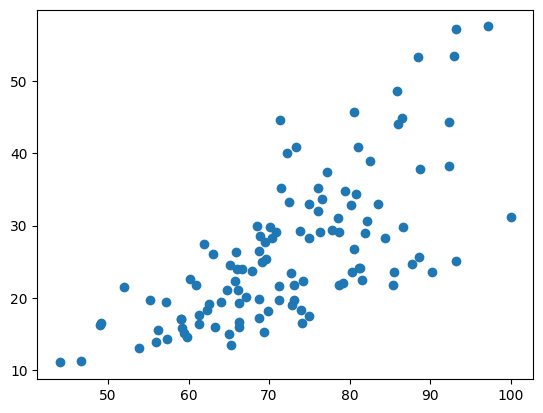

In [49]:
plt.scatter(df['스트레스'], df['시험'])
plt.show()

# 피어슨 상관계수

In [50]:
import pandas as pd
from scipy.stats import pearsonr

# 예시 데이터
data = {
    'height': [160, 165, 170, 175, 180],
    'weight': [50, 55, 65, 70, 80]
}
df = pd.DataFrame(data)

# 피어슨 상관계수 계산
corr, p_value = pearsonr(df['height'], df['weight'])

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")


피어슨 상관계수: 0.99
p-값: 0.0006


# 스피어만 상관계수

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# 데이터프레임 구성
data = {
    'student': ['A', 'B', 'C', 'D', 'E'],
    'academic_rank': [1, 2, 3, 4, 5],
    'sports_rank': [4, 2, 1, 3, 5]
}
df = pd.DataFrame(data)

# 스피어만 상관계수 계산  -  순위형 변수 간의 관계
rho, pval = spearmanr(df['academic_rank'], df['sports_rank'])

print(f"스피어만 상관계수: {rho:.3f}")
print(f"p-value: {pval:.4f}")

스피어만 상관계수: 0.300
p-value: 0.6238


# 켄달의 타우
변수의 순서 간의 상관성

In [52]:
import pandas as pd
from scipy.stats import kendalltau

# 사람 A~E의 키와 몸무게 순위
data = {
    'Person': ['A', 'B', 'C', 'D', 'E'],
    'Height_rank': [1, 2, 3, 4, 5],     # 키 순위
    'Weight_rank_1': [3, 4, 1, 2, 5],   # τ = 0.2
    'Weight_rank_2': [1, 2, 3, 4, 5],   # τ = 1
    'Weight_rank_3': [5, 4, 3, 2, 1]    # τ = -1
}

df = pd.DataFrame(data)

# 계수 계산
tau1, _ = kendalltau(df['Height_rank'], df['Weight_rank_1'])
tau2, _ = kendalltau(df['Height_rank'], df['Weight_rank_2'])
tau3, _ = kendalltau(df['Height_rank'], df['Weight_rank_3'])

print(f"상관계수 (Weight_rank_1): {tau1:.2f}")
print(f"상관계수 (Weight_rank_2): {tau2:.2f}")
print(f"상관계수 (Weight_rank_3): {tau3:.2f}")

상관계수 (Weight_rank_1): 0.20
상관계수 (Weight_rank_2): 1.00
상관계수 (Weight_rank_3): -1.00
